## NAS1 Financial Data Analysis (Python & Pandas) Hackathon
### Challenge #5 ###

In [15]:
import pandas_datareader as pdr
import pandas_datareader as web
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import logging

### Grabbing DataFrames filled with stock info on March 3, 2020

In [16]:
def finance(lst_stocks):
    #ticks=input('What ticker are you looking for? ')
    lst=[]
    LOG = logging.getLogger(__name__)
    start_date = datetime.datetime(2020, 3, 12)
    #ticker=ticks
    for ticker in lst_stocks:
        try:
            df = pdr.get_data_yahoo(ticker, start_date)
            data=pd.DataFrame(df)
            df['Date'] = df.index
            df ['Ticker']=ticker
            lst.append(df)

        except Exception as ex:
            LOG.error('Error getting data: ' + str(ex))
            
            LOG.error('Recieved price data:')
            LOG.error(str(df))

    return lst


In [17]:
run=finance(['GOOGL', 'UBER', 'AAPL', 'UAA'])
df_goog=run[0]
df_ub=run[1]
df_appl=run[2]
df_uaa=run[3]

In [18]:
x = datetime.datetime(2020,9,4)
beg_2020 = datetime.datetime(2020, 1, 1)
quarantine_date  = datetime.datetime(2020, 3, 15)

### Grabbing APPL's data for today's prices and after

In [19]:
df = pdr.get_data_yahoo('AAPL',x)
df

High         Low    Open       Close     Volume   Adj Close
Date                                                                         
2020-09-04  123.699997  110.889999  120.07  121.620003  309617619  121.620003

### getting just today's date's information

In [20]:
df.iloc[0] 

High         1.237000e+02
Low          1.108900e+02
Open         1.200700e+02
Close        1.216200e+02
Volume       3.096176e+08
Adj Close    1.216200e+02
Name: 2020-09-04 00:00:00, dtype: float64

### Apple info for Jan. 1, 2020

In [21]:
aapl_jan_2020 =  pdr.get_data_yahoo('AAPL',beg_2020)

### Grabbing Zoom data

In [22]:
zoom = pdr.get_data_yahoo('ZM',beg_2020)
#zoom_close = zoom['Close']
#zoom
merged=zoom.merge(aapl_jan_2020, on='Date', suffixes=['_ZM','_AAPL'])
#aapl_jan_2020
merged

High_ZM      Low_ZM     Open_ZM    Close_ZM  Volume_ZM  \
Date                                                                    
2020-01-02   69.235001   68.019997   68.800003   68.720001    1315500   
2020-01-03   68.680000   67.099998   67.620003   67.279999    1127900   
2020-01-06   70.495003   65.811996   66.629997   70.320000    3151600   
2020-01-07   72.838997   69.370003   70.290001   71.900002    6985400   
2020-01-08   73.290001   71.029999   71.809998   72.550003    2482300   
...                ...         ...         ...         ...        ...   
2020-08-31  325.899994  301.269989  304.010010  325.100006   23468100   
2020-09-01  478.000000  410.679993  439.510010  457.690002   53346800   
2020-09-02  445.670013  410.000000  445.670013  423.559998   18866800   
2020-09-03  409.899994  367.000000  399.549988  381.320007   20126500   
2020-09-04  386.010010  346.760010  375.500000  370.000000   12901490   

            Adj Close_ZM   High_AAPL    Low_AAPL   Open_AAPL  Close_AAPL  \
Date                                                                       
2020-01-02     68.720001   75.150002   73.797501   74.059998   75.087502   
2020-01-03     67.279999   75.144997   74.125000   74.287498   74.357498   
2020-01-06     70.320000   74.989998   73.187500   73.447502   74.949997   
2020-01-07     71.900002   75.224998   74.370003   74.959999   74.597504   
2020-01-08     72.550003   76.110001   74.290001   74.290001   75.797501   
...                  ...         ...         ...         ...         ...   
2020-08-31    325.100006  131.000000  126.000000  127.580002  129.039993   
2020-09-01    457.690002  134.800003  130.529999  132.759995  134.179993   
2020-09-02    423.559998  137.979996  127.000000  137.589996  131.399994   
2020-09-03    381.320007  128.839996  120.500000  126.910004  120.879997   
2020-09-04    370.000000  123.699997  110.889999  120.070000  121.639999   

            Volume_AAPL  Adj Close_AAPL  
Date                                     
2020-01-02  135480400.0       74.573036  
2020-01-03  146322800.0       73.848030  
2020-01-06  118387200.0       74.436470  
2020-01-07  108872000.0       74.086395  
2020-01-08  132079200.0       75.278160  
...                 ...             ...  
2020-08-31  225702700.0      129.039993  
2020-09-01  152470100.0      134.179993  
2020-09-02  200119000.0      131.399994  
2020-09-03  254723200.0      120.879997  
2020-09-04  309669874.0      121.639999  

[172 rows x 12 columns]

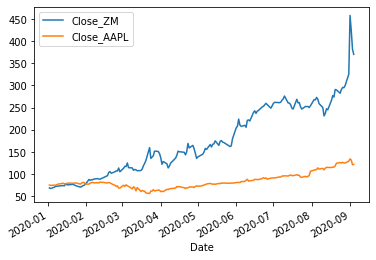

In [23]:
merged[ ['Close_ZM', 'Close_AAPL'] ].plot()

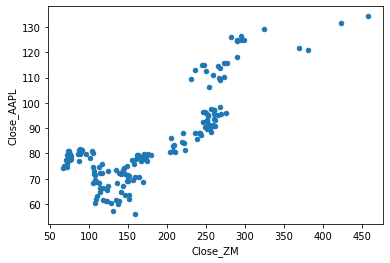

In [24]:
scat = merged.plot.scatter(x='Close_ZM', y='Close_AAPL')

### Plotting Stock Pricing Data

In [26]:
tickers = ['FB', 'AAPL', 'TSLA', 'MSFT', 'AMZN', 'GOOGL', 'NFLX']
start_date = '2020-01-01'
end_date = '2020-09-02'

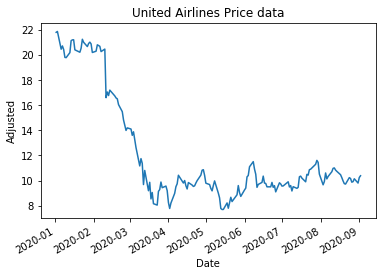

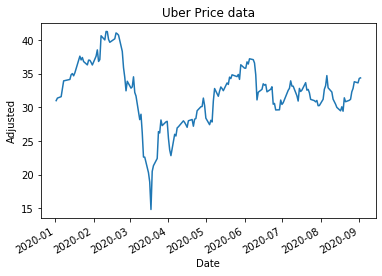

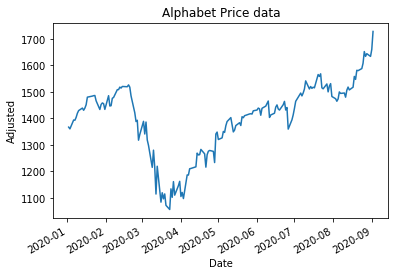

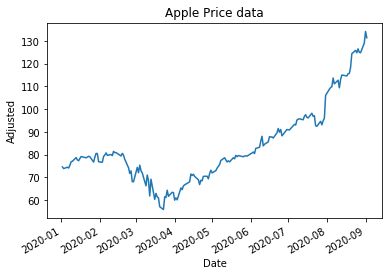

In [27]:
united_airlines_data = web.get_data_yahoo("UAA", start_date, end_date)
united_airlines_data['Adj Close'].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted")
plt.title("United Airlines Price data")
plt.show()

uber_data = web.get_data_yahoo("UBER", start_date, end_date)
uber_data['Adj Close'].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted")
plt.title("Uber Price data")
plt.show()

alphabet_data = web.get_data_yahoo("GOOG", start_date, end_date)
alphabet_data['Adj Close'].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted")
plt.title("Alphabet Price data")
plt.show()

apple_data = web.get_data_yahoo("AAPL", start_date, end_date)
apple_data['Adj Close'].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted")
plt.title("Apple Price data")
plt.show()

## Plotting Daily & Monthly Returns

Date
2020-01-02         NaN
2020-01-03    0.003214
2020-01-06   -0.064531
2020-01-07    0.012720
2020-01-08   -0.013527
Name: Adj Close, dtype: float64
Date
2020-01-31         NaN
2020-02-29   -0.296829
2020-03-31   -0.350951
2020-04-30    0.131379
2020-05-31   -0.160269
Freq: M, Name: Adj Close, dtype: float64


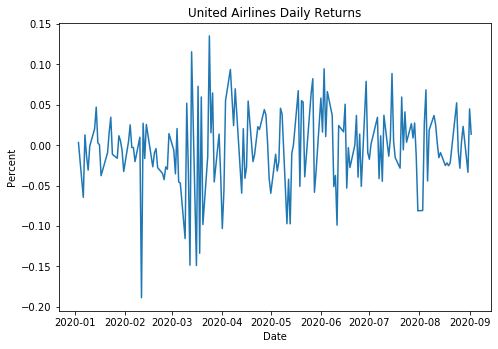

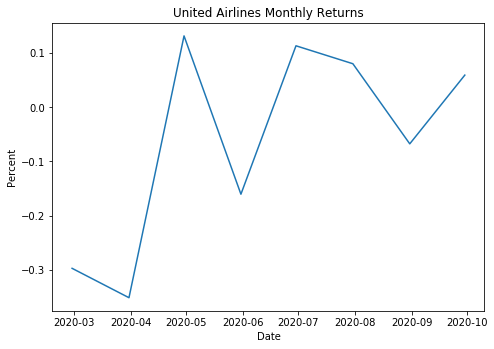

In [28]:
united_airlines_daily_returns = united_airlines_data['Adj Close'].pct_change()
united_airlines_monthly_returns = united_airlines_data['Adj Close'].resample('M').ffill().pct_change()
print(united_airlines_daily_returns.head())
print(united_airlines_monthly_returns.head())

fig = plt.figure()
ax1 = fig.add_axes([0.2,0.2,1.0,1.0])
ax1.plot(united_airlines_daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title('United Airlines Daily Returns')
plt.show()

fig = plt.figure()
ax1 = fig.add_axes([0.2,0.2,1.0,1.0])
ax1.plot(united_airlines_monthly_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("United Airlines Monthly Returns")
plt.show()

Date
2020-01-02         NaN
2020-01-03    0.012262
2020-01-06    0.006694
2020-01-07    0.038949
2020-01-08    0.034136
Name: Adj Close, dtype: float64
Date
2020-01-31         NaN
2020-02-29   -0.066685
2020-03-31   -0.175672
2020-04-30    0.084169
2020-05-31    0.199868
Freq: M, Name: Adj Close, dtype: float64


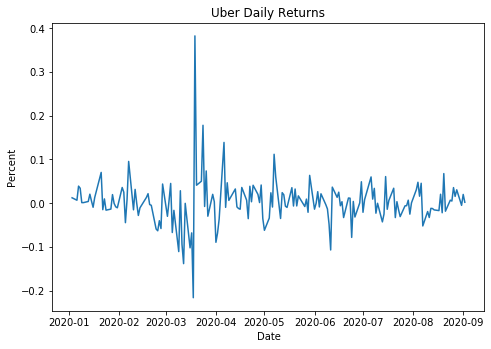

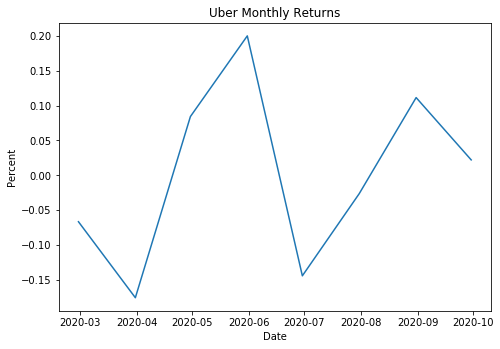

In [29]:
uber_daily_returns = uber_data['Adj Close'].pct_change()
uber_monthly_returns = uber_data['Adj Close'].resample('M').ffill().pct_change()
print(uber_daily_returns.head())
print(uber_monthly_returns.head())

fig = plt.figure()
ax1 = fig.add_axes([0.2,0.2,1.0,1.0])
ax1.plot(uber_daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Uber Daily Returns")
plt.show()

fig = plt.figure()
ax1 = fig.add_axes([0.2,0.2,1.0,1.0])
ax1.plot(uber_monthly_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Uber Monthly Returns")
plt.show()

Date
2020-01-02         NaN
2020-01-03   -0.004907
2020-01-06    0.024657
2020-01-07   -0.000624
2020-01-08    0.007880
Name: Adj Close, dtype: float64
Date
2020-01-31         NaN
2020-02-29   -0.066168
2020-03-31   -0.131797
2020-04-30    0.159828
2020-05-31    0.059511
Freq: M, Name: Adj Close, dtype: float64


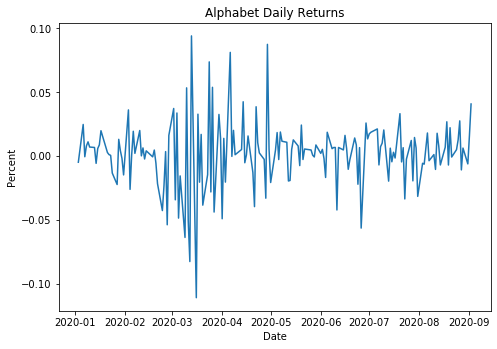

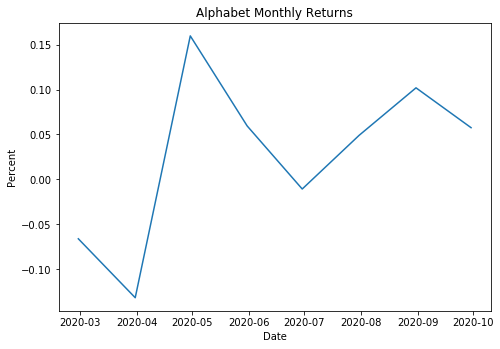

In [30]:
alphabet_daily_returns = alphabet_data['Adj Close'].pct_change()
alphabet_monthly_returns = alphabet_data['Adj Close'].resample('M').ffill().pct_change()
print(alphabet_daily_returns.head())
print(alphabet_monthly_returns.head())

fig = plt.figure()
ax1 = fig.add_axes([0.2,0.2,1.0,1.0])
ax1.plot(alphabet_daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Alphabet Daily Returns")
plt.show()

fig = plt.figure()
ax1 = fig.add_axes([0.2,0.2,1.0,1.0])
ax1.plot(alphabet_monthly_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Alphabet Monthly Returns")
plt.show()